<a href="https://colab.research.google.com/github/Sireesha0216/Artificial--intelligence-and--Machine--learning--/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!unzip '/content/Animal_Dataset.zip'

Archive:  /content/Animal_Dataset.zip
   creating: dataset/
   creating: dataset/Testing/
   creating: dataset/Testing/bears/
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: da

In [27]:
#Data Augmentation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1.255))
#--> (0 to 255) convert to (0 to 1)

In [29]:
train = train_gen.flow_from_directory('/content/dataset/Training',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/dataset/Testing',
                                     target_size=(120, 120),
                                    class_mode='categorical',
                                    batch_size=8)


Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [30]:
train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN

In [20]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(4,activation='softmax'))


In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
155/155 [==============================] - 24s 147ms/step - loss: 1.1228 - accuracy: 0.5460 - val_loss: 116.0933 - val_accuracy: 0.7423
Epoch 2/10
155/155 [==============================] - 22s 141ms/step - loss: 0.5838 - accuracy: 0.7989 - val_loss: 105.8011 - val_accuracy: 0.7055
Epoch 3/10
155/155 [==============================] - 21s 137ms/step - loss: 0.2879 - accuracy: 0.9152 - val_loss: 15.7936 - val_accuracy: 0.9509
Epoch 4/10
155/155 [==============================] - 21s 132ms/step - loss: 0.2048 - accuracy: 0.9410 - val_loss: 25.6564 - val_accuracy: 0.9479
Epoch 5/10
155/155 [==============================] - 20s 131ms/step - loss: 0.1034 - accuracy: 0.9742 - val_loss: 8.8675 - val_accuracy: 0.9908
Epoch 6/10
155/155 [==============================] - 21s 139ms/step - loss: 0.0700 - accuracy: 0.9838 - val_loss: 0.7946 - val_accuracy: 0.9939
Epoch 7/10
155/155 [==============================] - 20s 131ms/step - loss: 0.0537 - accuracy: 0.9879 - val_loss: 11.0650 -

In [33]:
model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [35]:
img = image.load_img('/content/rat.jpg',target_size=(120,120))

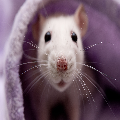

In [36]:
img

In [37]:
img = image.img_to_array(img)
img

array([[[192., 173., 203.],
        [197., 178., 208.],
        [198., 182., 211.],
        ...,
        [194., 181., 199.],
        [200., 187., 205.],
        [206., 193., 211.]],

       [[191., 172., 204.],
        [192., 173., 203.],
        [193., 177., 206.],
        ...,
        [184., 169., 188.],
        [194., 181., 199.],
        [201., 188., 206.]],

       [[188., 169., 201.],
        [191., 172., 202.],
        [194., 175., 205.],
        ...,
        [169., 150., 170.],
        [180., 163., 182.],
        [192., 179., 199.]],

       ...,

       [[214., 200., 223.],
        [209., 195., 220.],
        [208., 194., 217.],
        ...,
        [ 69.,  45.,  69.],
        [ 73.,  47.,  72.],
        [ 74.,  49.,  71.]],

       [[212., 198., 221.],
        [209., 195., 220.],
        [208., 194., 217.],
        ...,
        [ 80.,  55.,  77.],
        [ 78.,  54.,  76.],
        [ 77.,  52.,  74.]],

       [[212., 198., 223.],
        [209., 195., 220.],
        [206., 1

In [38]:
img = np.expand_dims(img,axis=0)
img

array([[[[192., 173., 203.],
         [197., 178., 208.],
         [198., 182., 211.],
         ...,
         [194., 181., 199.],
         [200., 187., 205.],
         [206., 193., 211.]],

        [[191., 172., 204.],
         [192., 173., 203.],
         [193., 177., 206.],
         ...,
         [184., 169., 188.],
         [194., 181., 199.],
         [201., 188., 206.]],

        [[188., 169., 201.],
         [191., 172., 202.],
         [194., 175., 205.],
         ...,
         [169., 150., 170.],
         [180., 163., 182.],
         [192., 179., 199.]],

        ...,

        [[214., 200., 223.],
         [209., 195., 220.],
         [208., 194., 217.],
         ...,
         [ 69.,  45.,  69.],
         [ 73.,  47.,  72.],
         [ 74.,  49.,  71.]],

        [[212., 198., 221.],
         [209., 195., 220.],
         [208., 194., 217.],
         ...,
         [ 80.,  55.,  77.],
         [ 78.,  54.,  76.],
         [ 77.,  52.,  74.]],

        [[212., 198., 223.],
       

Final Output

In [39]:
b=np.argmax(model.predict(img))
if(b==3):
  b = 'a rat'
else:
  b = 'not a rat'
print("Our model says it is ",b)


1/1 [==============================] - 0s 112ms/step
Our model says it is  a rat
